In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf

In [ ]:
df= yf.download('RELIANCE.NS', period='2000d', interval='1d')

[*********************100%***********************]  1 of 1 completed


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-05-29,541.120728,541.566467,529.159119,531.734680,506.907227,12764704
2014-05-30,537.405945,539.733887,525.023315,527.351257,502.728485,7981124
2014-06-02,532.329041,539.015686,527.648438,536.019104,510.991699,4064105
2014-06-03,536.563904,545.826111,533.616821,542.557129,517.224548,5018511
2014-06-04,541.195007,545.727051,533.072021,533.691162,508.772430,4073385
...,...,...,...,...,...,...
2022-06-30,2580.000000,2615.899902,2566.000000,2595.649902,2595.649902,10666627
2022-07-01,2574.899902,2592.000000,2365.000000,2408.699951,2408.699951,37841671
2022-07-04,2378.949951,2442.000000,2366.100098,2413.699951,2413.699951,19317335


In [ ]:
df1=df.reset_index().Close

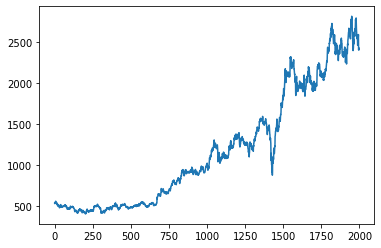

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
df1.shape

(1999,)

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler #LSTM sensitive to scale of data
scaler= MinMaxScaler(feature_range=(0.25,0.75))
df1= scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1.shape

(1999, 1)

In [ ]:
df1

array([[0.27691294],
       [0.27600663],
       [0.27779878],
       ...,
       [0.66602505],
       [0.67006719],
       [0.66564258]])

In [ ]:
training_size= int(len(df1)*0.65)
test_size=len(df)-training_size
train_data, test_data= df1[0:training_size,:], df1[training_size:len(df1),:]

In [ ]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
X_train.shape, y_train.shape

((1198, 100), (1198,))

In [ ]:
X_test.shape

(599, 100)

In [ ]:
X_train

array([[0.27691294, 0.27600663, 0.27779878, ..., 0.26214564, 0.2638149 ,
        0.26337454],
       [0.27600663, 0.27779878, 0.27915057, ..., 0.2638149 , 0.26337454,
        0.26262696],
       [0.27779878, 0.27915057, 0.27731746, ..., 0.26337454, 0.26262696,
        0.26442423],
       ...,
       [0.43922523, 0.44029029, 0.4396656 , ..., 0.42269652, 0.41406348,
        0.41298819],
       [0.44029029, 0.4396656 , 0.44281978, ..., 0.41406348, 0.41298819,
        0.41246592],
       [0.4396656 , 0.44281978, 0.44206195, ..., 0.41298819, 0.41246592,
        0.41736104]])

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
#For LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
19/19 [==============================] - 10s 246ms/step - loss: 0.0193 - val_loss: 0.0310
Epoch 2/100
19/19 [==============================] - 3s 177ms/step - loss: 0.0015 - val_loss: 0.0218
Epoch 3/100
19/19 [==============================] - 3s 179ms/step - loss: 7.8552e-04 - val_loss: 0.0125
Epoch 4/100
19/19 [==============================] - 3s 177ms/step - loss: 5.2395e-04 - val_loss: 0.0073
Epoch 5/100
19/19 [==============================] - 3s 177ms/step - loss: 2.9675e-04 - val_loss: 0.0031
Epoch 6/100
19/19 [==============================] - 3s 179ms/step - loss: 1.5033e-04 - val_loss: 0.0011
Epoch 7/100
19/19 [==============================] - 3s 177ms/step - loss: 8.4820e-05 - val_loss: 7.0506e-04
Epoch 8/100
19/19 [==============================] - 3s 180ms/step - loss: 6.9601e-05 - val_loss: 7.7641e-04
Epoch 9/100
19/19 [==============================] - 3s 178ms/step - loss: 6.7891e-05 - val_loss: 7.7332e-04
Epoch 10/100
19/19 [==============================

In [ ]:
train_predict=model.predict(X_train)
test_predict= model.predict(X_test)

In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

803.1717021512699

In [ ]:
math.sqrt(mean_squared_error(ytest,test_predict))

2006.3784631926503

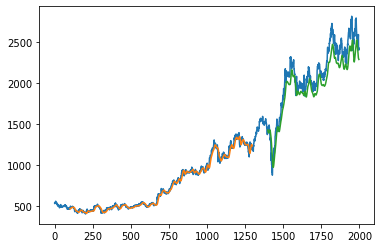

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

700

In [ ]:
x_input=test_data[len(test_data)-100:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.6592744085383744,
 0.6583129517397601,
 0.6504871769794522,
 0.666903772924166,
 0.6658699809760575,
 0.672186459874625,
 0.6682373544416016,
 0.66317177389587,
 0.6609181276402425,
 0.6578270998110225,
 0.6333675722231512,
 0.6391981487148586,
 0.6548291031615079,
 0.6628926803567541,
 0.6587058229669147,
 0.6477993179143702,
 0.6300180964069042,
 0.6291807148333117,
 0.6537022800336942,
 0.661590092406513,
 0.6630167051036537,
 0.6670898857616991,
 0.6556354406897835,
 0.6638851307225628,
 0.6800846202625493,
 0.6771279651953346,
 0.6903088125337178,
 0.6919732276657969,
 0.7001298360407485,
 0.7036861207247397,
 0.7090824844069925,
 0.7092065596320145,
 0.7196271622776991,
 0.7117290018897747,
 0.7160916241020415,
 0.7177146471736984,
 0.7099302139956905,
 0.7084829052683386,
 0.6989306777634406,
 0.7077798964567513,
 0.7066530733289376,
 0.6964909186702801,
 0.6945473595209627,
 0.6929346844644114,
 0.7129799002426105,
 0.7290346690054864,
 0.7421948707917809,
 0.737377390217970

In [ ]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.63817513]
101
1 day input [0.65831295 0.65048718 0.66690377 0.66586998 0.67218646 0.66823735
 0.66317177 0.66091813 0.6578271  0.63336757 0.63919815 0.6548291
 0.66289268 0.65870582 0.64779932 0.6300181  0.62918071 0.65370228
 0.66159009 0.66301671 0.66708989 0.65563544 0.66388513 0.68008462
 0.67712797 0.69030881 0.69197323 0.70012984 0.70368612 0.70908248
 0.70920656 0.71962716 0.711729   0.71609162 0.71771465 0.70993021
 0.70848291 0.69893068 0.7077799  0.70665307 0.69649092 0.69454736
 0.69293468 0.7129799  0.72903467 0.74219487 0.73737739 0.72418619
 0.74086124 0.74141953 0.75       0.74387993 0.74185369 0.72390705
 0.71300055 0.70881369 0.687652   0.67862696 0.67338567 0.66306839
 0.66869226 0.66881629 0.6898953  0.69179751 0.67970215 0.70959938
 0.70597076 0.70782129 0.70702525 0.70187698 0.69939588 0.7179421
 0.71129479 0.71147055 0.73024423 0.74165728 0.73918653 0.74026166
 0.73019254 0.74563738 0.72816629 0.71754923 0.71035408 0.70377915
 0.69627381 0.70247656 0.69276927 0

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

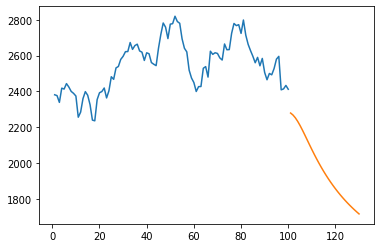

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[len(df1)-100:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))